Generating 40401 rays...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


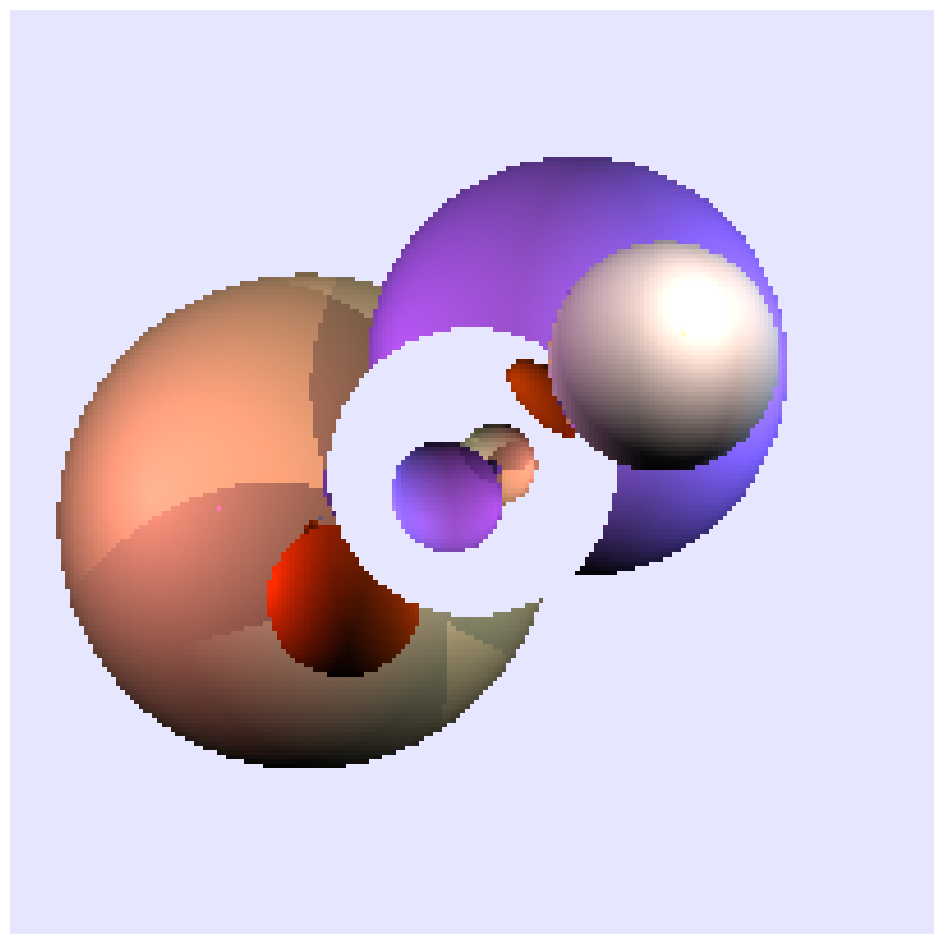

In [10]:
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from vector import Vector, Angle
from object import Sphere
from ray import Ray, Intersection
from material import Material
from colour import Colour
from light import GlobalLight, PointLight

base_material = Material()
emitive_material = Material(emitive=True)
reflective_material = Material(reflective=True)
glass = Material(reflective=False, transparent=True, refractive_index=2)

# LIGHTS
global_light = GlobalLight(vector=Vector(0.1, 1, -0.2), colour=Colour(255, 255, 255), strength=0.5, max_angle=np.radians(180), func=0)
global_light_sources = [global_light]

right_light_sphere = Sphere(id=200,centre=Vector(5, 0.5, 1.5), radius=0.05, material=emitive_material, colour=Colour(179, 230, 255))
right_light = PointLight(id=right_light_sphere.id, position=right_light_sphere.centre, colour=right_light_sphere.colour, strength=5, max_angle=np.radians(90), func=0)

left_light_sphere = Sphere(id=201,centre=Vector(-5, 0.5, 2.5), radius=0.05, material=emitive_material, colour=Colour(255, 153, 194))
left_light = PointLight(id=left_light_sphere.id, position=left_light_sphere.centre, colour=left_light_sphere.colour, strength=5, max_angle=np.radians(90), func=0)

back_light_sphere = Sphere(id=202,centre=Vector(1, 1, 6), radius=0.05, material=emitive_material, colour=Colour(255, 218, 179))
back_light = PointLight(id=back_light_sphere.id, position=back_light_sphere.centre, colour=back_light_sphere.colour, strength=3, max_angle=np.radians(90), func=0)

point_light_sources = [right_light, left_light, back_light]

# BALLS
spheres = [right_light_sphere, left_light_sphere, back_light_sphere]

# GLASS BALLS
# centre marble
spheres.append(Sphere(id=len(spheres), centre=Vector(0, 0, 2), radius=0.5, material=glass, colour=Colour(100, 100, 100)))

# NORMAL BALLS
# big purple
spheres.append(Sphere(id=len(spheres), centre=Vector(0.5, 0.5, -1), radius=1, material=base_material, colour=Colour(153, 102, 255)))
# small red
spheres.append(Sphere(id=len(spheres), centre=Vector(-0.5, -0.5, 1), radius=0.3, material=base_material, colour=Colour(204, 51, 0)))

# REFLECTIVE BALLS
# front
spheres.append(Sphere(id=len(spheres), centre=Vector(0.5, 0.3, 4), radius=0.3, material=reflective_material, colour=Colour(194, 194, 214)))
# back
spheres.append(Sphere(id=len(spheres), centre=Vector(-1, -0.1, -6), radius=1.5, material=reflective_material, colour=Colour(255, 214, 153)))

ray_origin = Vector(0, 0, 10)
rays = []

RAY_COUNT = 100   # = rays in each axis = 2 * ray count + 1 (for centre ray)
RAY_STEP = 0.002   # 0.003 = long focal distance

multiple = 1     # 1 is normal, 2 is ok, 5 is good, 10 is mega
RAY_COUNT *= multiple
RAY_STEP /= multiple

X_RAYS = [r*RAY_STEP for r in range(-RAY_COUNT, 0, 1)] + [r*RAY_STEP for r in range(0, RAY_COUNT + 1)]
Y_RAYS = [r*RAY_STEP for r in range(RAY_COUNT, 0, -1)] + [-r*RAY_STEP for r in range(0, RAY_COUNT + 1)]
Z = -1

MAX_BOUNCES = 8

TOTAL_RAYS = len(X_RAYS) * len(Y_RAYS)

print(f"Generating {TOTAL_RAYS} rays...")
for Y in Y_RAYS:
    for X in X_RAYS:
        ray = Ray(
            origin=ray_origin,
            D=Vector(x=X, y=Y, z=-1)
        )
        rays.append(ray)

background_colour = Colour(0, 0, 1)
black_colour = Colour(0, 0, 1)
sky_colour = Colour(230, 230, 255)

pixels = []

progress_milestones = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for i, ray in enumerate(rays):

    progress = (i+1) / len(rays) * 100
    if progress > progress_milestones[0]:
        progress_milestones.pop(0)
        print(f"Casting Rays: {progress:.0f}%", end="\r")

    ray_terminal = ray.nearestSphereIntersect(spheres, max_bounces=MAX_BOUNCES)

    if ray_terminal == None:
        pixels.append(sky_colour.getList())

    if ray_terminal != None:
        pixels.append(ray_terminal.terminalRGB(
            spheres=spheres,
            background_colour=background_colour,
            global_light_sources=global_light_sources,
            point_light_sources=point_light_sources
        ).getList())

X_SIZE = len(X_RAYS)
Y_SIZE = len(Y_RAYS)

pixels = np.array(pixels).reshape((X_SIZE, Y_SIZE, 3))

plt.figure(figsize=(12, 12))    # 64 x 64 = high-res output
plt.imshow(pixels)
plt.axis('off')
plt.savefig('render_output.png', bbox_inches='tight')
plt.show()